In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [80]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [81]:
data.shape

(7043, 21)

given data set contains 7043 rows and 21 features

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


there are 20 features including target feature and most of them are categorical variables and there in no null values.             
Total charges is in object data type, that needs to be changed to float64 data type

In [83]:
data['TotalCharges'].value_counts()

20.2       11
           11
19.75       9
19.65       8
19.9        8
           ..
7159.05     1
966.55      1
66.95       1
1553.2      1
326.8       1
Name: TotalCharges, Length: 6531, dtype: int64

In [84]:
#since null values are denoted with blanks " ", replacing the blanks with NaN
data['TotalCharges']=np.where(data['TotalCharges']==' ',np.NaN,data['TotalCharges'])

In [87]:
#converting the fetaure data type as float now
data['TotalCharges']=data['TotalCharges'].astype(float)

In [89]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Observations:
    1. senior citizens feature should be a categorical feature as it contains only 0 and 1.
    2. minimum tenure is 0 and the maximum is 72. Tenure feature is skewed to the right
    3. Minimum Monthly charges is 18.25 and the maximum is 118.75 and the feature is skewed to the left 
    4. Minimum Total Charges is 1880 and the maximum is 8684.80

# EDA: UniVariate Analysis

In [9]:
len(data['customerID'])

7043

Customer ID is unique to each feature, this will not impact the target variable in the given data set

<AxesSubplot:xlabel='gender', ylabel='count'>

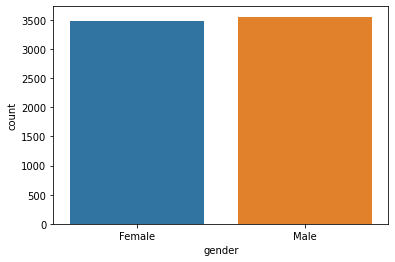

In [10]:
sns.countplot(x=data['gender'])

nearly 3500 data are from male and 3500 from female in the given data set

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

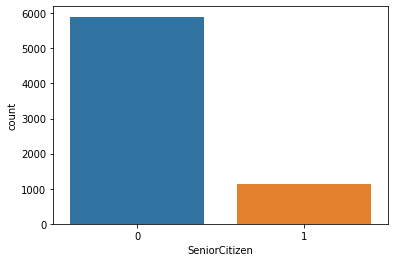

In [13]:
sns.countplot(x=data['SeniorCitizen'])

nealy 6000 user are from 0 senior citizenship category and the rest are from 1 category in the given data set

<AxesSubplot:xlabel='Partner', ylabel='count'>

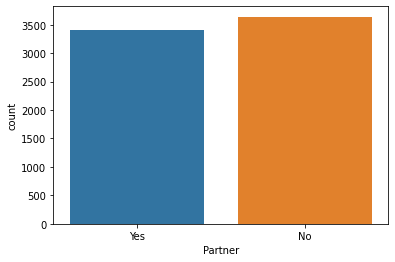

In [15]:
sns.countplot(x=data['Partner'])

nealy 3400 users are partners category and te rest are no partner category in the given data set

<AxesSubplot:xlabel='Dependents', ylabel='count'>

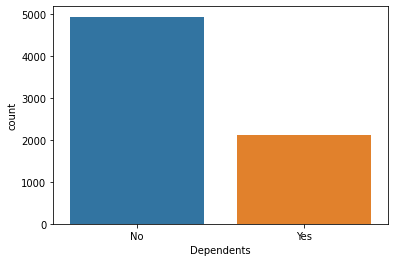

In [17]:
sns.countplot(x=data['Dependents'])

nearly 5000 users are having no dependents and the rest are having dependents

<AxesSubplot:xlabel='tenure', ylabel='count'>

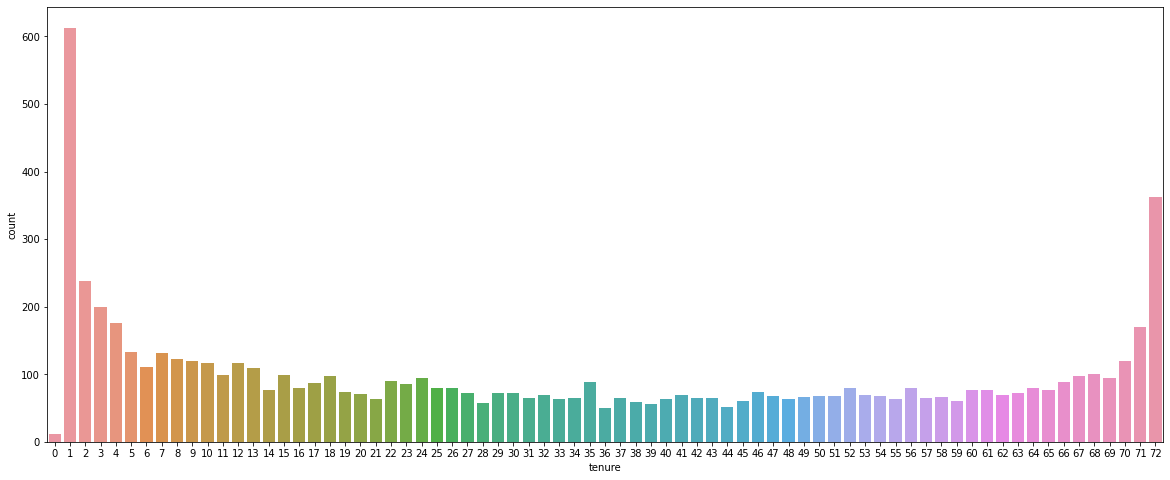

In [22]:
plt.figure(figsize=(20,8))
sns.countplot(x=data['tenure'])

highest number of users falls under 1 tennure category and the next highest is 72 tennure category in the given data set

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

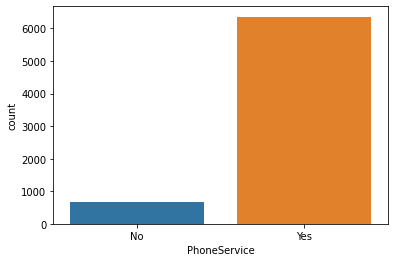

In [23]:
sns.countplot(x=data['PhoneService'])

more than 6000 users flass under Phone service category as Yes

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

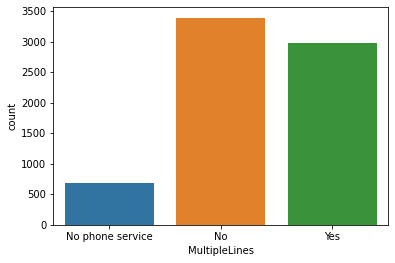

In [24]:
sns.countplot(x=data['MultipleLines'])

Multiple lines features has three category as follows, No phone service, No, yes. No category users are high in the give data set

<AxesSubplot:xlabel='InternetService', ylabel='count'>

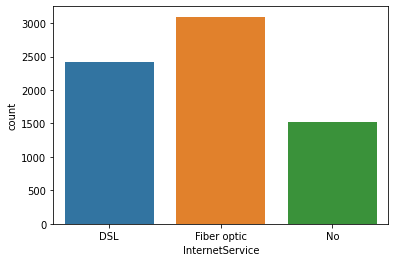

In [91]:
sns.countplot(x=data['InternetService'])

Internet service features has three category as follows, DSL, Fiber Optic, No. Fiber Optic category users are high in the give data set

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

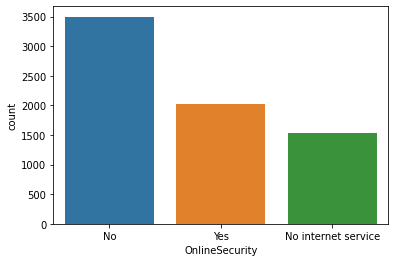

In [92]:
sns.countplot(x=data['OnlineSecurity'])

Online security features has three category as follows, No, Yes, No Internet service. Nocategory users are high in the give data set


<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

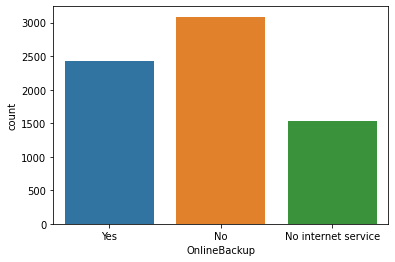

In [93]:
sns.countplot(x=data['OnlineBackup'])

OnlineBackup features has three category as follows, No, Yes, No Internet service. No category users are high in the give data set

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

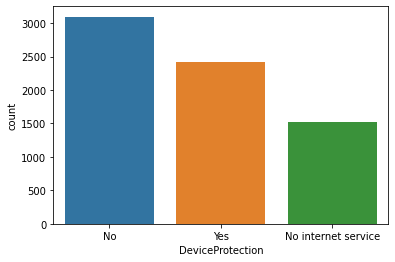

In [94]:
sns.countplot(x=data['DeviceProtection'])

DeviceProtection features has three category as follows, No, Yes, No Internet service. No category users are high in the give data set

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

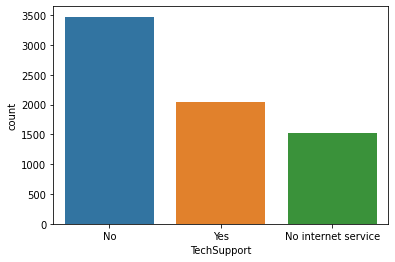

In [95]:
sns.countplot(x=data['TechSupport'])

TechSupport features has three category as follows, No, Yes, No Internet service. No category users are high in the give data set

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

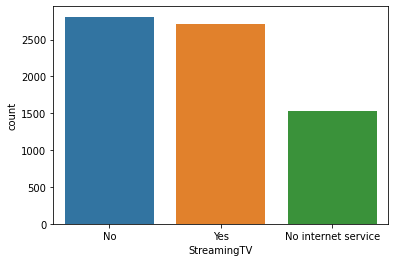

In [96]:
sns.countplot(x=data['StreamingTV'])

StreamingTV features has three category as follows, No, Yes, No Internet service. No and Yes category users are high in the give data set

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

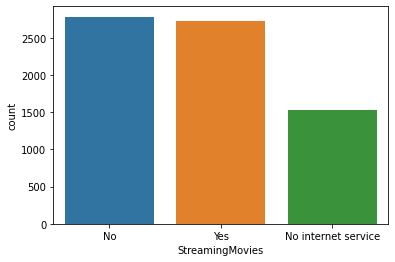

In [97]:
sns.countplot(x=data['StreamingMovies'])

Streaming Movies features has three category as follows, No, Yes, No Internet service. No and Yes category users are high in the give data set

<AxesSubplot:xlabel='Contract', ylabel='count'>

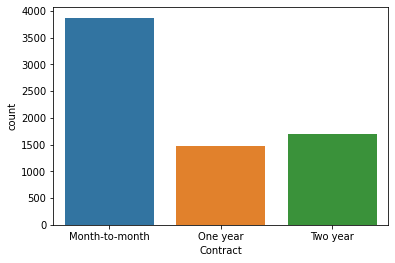

In [98]:
sns.countplot(x=data['Contract'])

User are alling into three categories based on contract features, month-month users are hig in the given data set

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

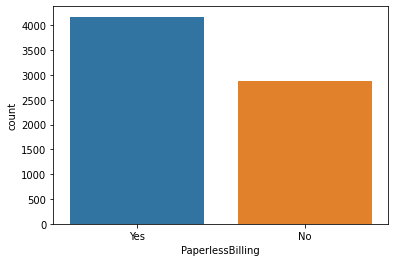

In [99]:
sns.countplot(x=data['PaperlessBilling'])

more than 4000 users are opted for paperless billings and the rest are not opted for paperless billing

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

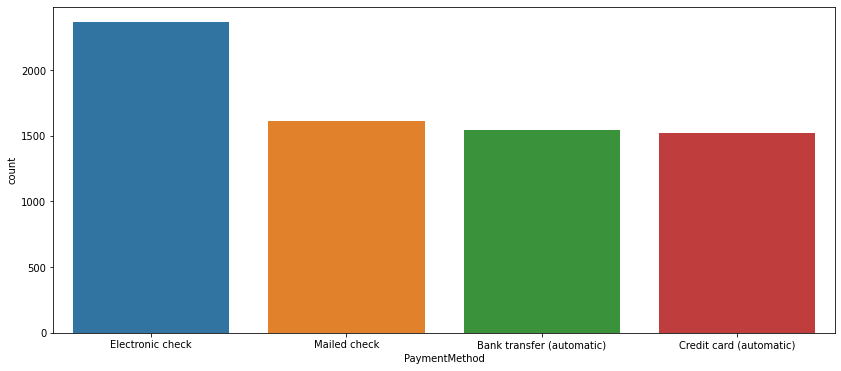

In [104]:
plt.figure(figsize=(14,6))
sns.countplot(x=data['PaymentMethod'])

there are four billpayment methos as per given data set ., those are Electronic check, Mailed Check, Bank transfer, Credit card                               
most of teh payemnts are made through electronic check

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

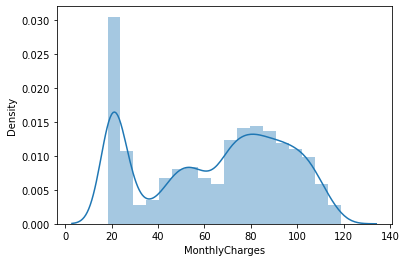

In [105]:
sns.distplot(data['MonthlyCharges'])

Monthly charge skewed to the left, minimum charge is less than 20 and the maximumis nearly 120

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

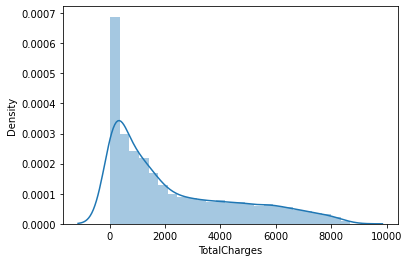

In [102]:
sns.distplot(data['TotalCharges'])

Total charge skewed to the right, minimum charge is 0 and the maximum charge nearly 9000. minimum monthly charge is 18 but the total is 0., it contradicts each other., lets check the line item once

In [109]:
data[data['TotalCharges']==data['TotalCharges'].min()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1654,2967-MXRAV,Male,0,Yes,Yes,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,18.8,18.8,No


This contradiction is due to nan values., we will fix them in feature engineering section

<AxesSubplot:xlabel='Churn', ylabel='count'>

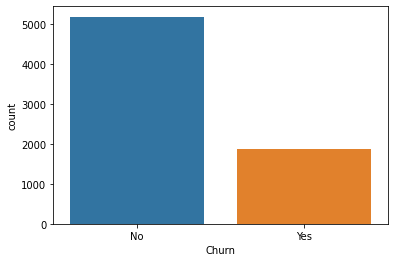

In [103]:
sns.countplot(x=data['Churn'])

nearly 5000 users are not in churn category and the rest are in churn category

# BIVARIATE ANALYSIS

<AxesSubplot:xlabel='Churn', ylabel='count'>

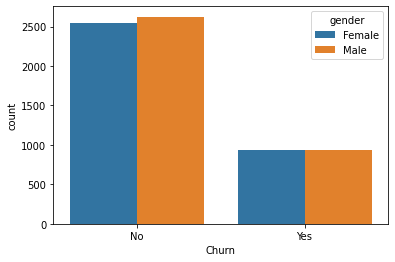

In [115]:
sns.countplot(x='Churn',hue='gender',data=data)

both male and female users are equally faalling in churn category

<AxesSubplot:xlabel='Churn', ylabel='count'>

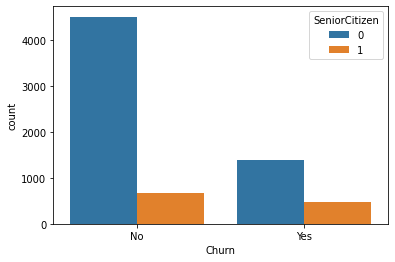

In [116]:
sns.countplot(x='Churn',hue='SeniorCitizen',data=data)

senior citizens are more or less equally faling in chrun and no churn category

<AxesSubplot:xlabel='Churn', ylabel='count'>

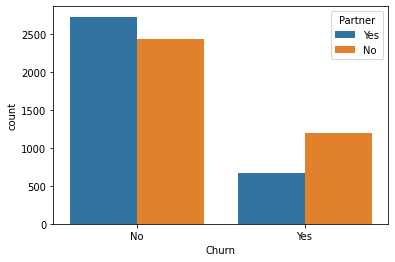

In [117]:
sns.countplot(x='Churn',hue='Partner',data=data)

user who has partners falls under churn category highly, no partners users are comparitively less

<AxesSubplot:xlabel='Churn', ylabel='count'>

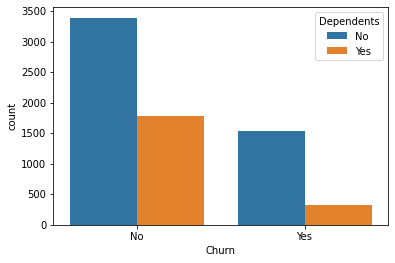

In [118]:
sns.countplot(x='Churn',hue='Dependents',data=data)

compartively users who does not have dependents falls more into churn category

<AxesSubplot:xlabel='tenure', ylabel='count'>

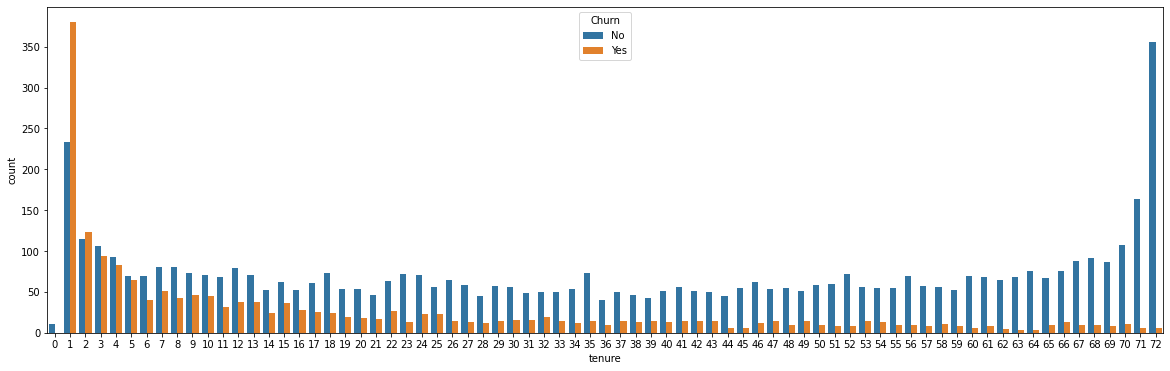

In [133]:
plt.figure(figsize=(20,6))
sns.countplot(x='tenure',hue='Churn',data=data)

users whose tennure is 1 month category falls more into Churn category where are the highest tennure users falls highly in no churn category...                
users whose tennure is less than 5 there is a high possibility for the users to fall into churn category

<AxesSubplot:xlabel='Churn', ylabel='count'>

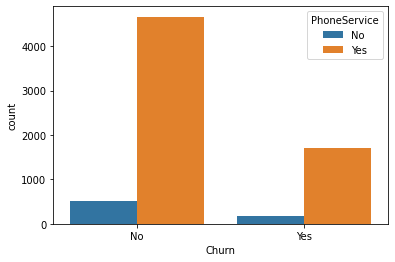

In [135]:
sns.countplot(x='Churn',hue='PhoneService',data=data)

user whose phone service is yes, falls more in churn

<AxesSubplot:xlabel='Churn', ylabel='count'>

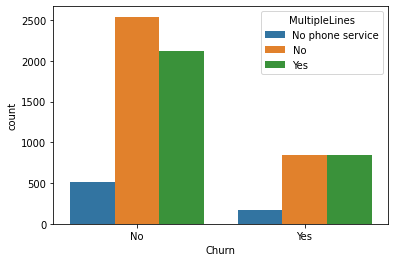

In [136]:
sns.countplot(x='Churn',hue='MultipleLines',data=data)

user whose multiple lines category is no and yes, falls more in churn

<AxesSubplot:xlabel='Churn', ylabel='count'>

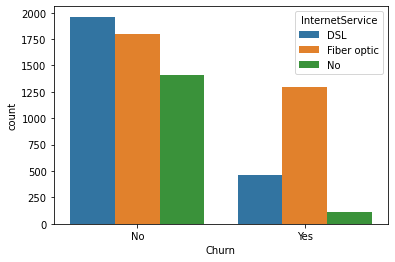

In [137]:
sns.countplot(x='Churn',hue='InternetService',data=data)

most of the fiber optic users are falling into churn category

<AxesSubplot:xlabel='Churn', ylabel='count'>

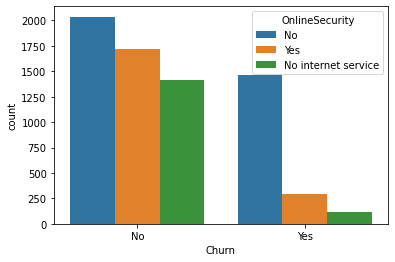

In [138]:
sns.countplot(x='Churn',hue='OnlineSecurity',data=data)

Users whose online security category is No., falls more into churn category

<AxesSubplot:xlabel='Churn', ylabel='count'>

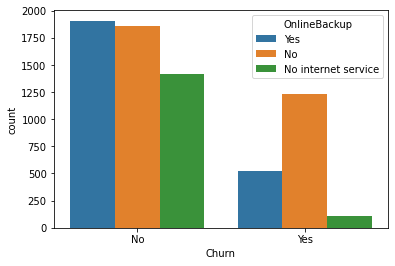

In [139]:
sns.countplot(x='Churn',hue='OnlineBackup',data=data)

Users whose online backup category is No., falls more into churn category

<AxesSubplot:xlabel='Churn', ylabel='count'>

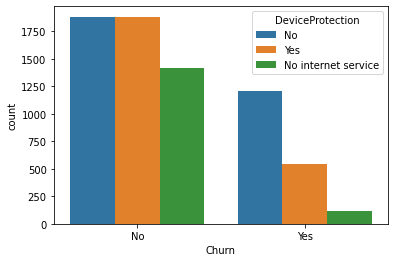

In [140]:
sns.countplot(x='Churn',hue='DeviceProtection',data=data)

Users whose device protection is No., falls more into churn category

<AxesSubplot:xlabel='Churn', ylabel='count'>

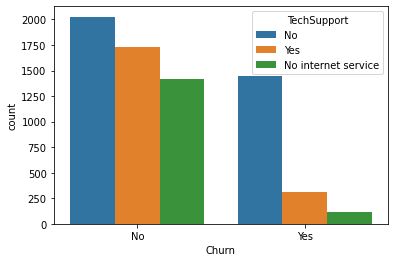

In [141]:
sns.countplot(x='Churn',hue='TechSupport',data=data)

Users whose TechSupport is No., falls more into churn category

<AxesSubplot:xlabel='Churn', ylabel='count'>

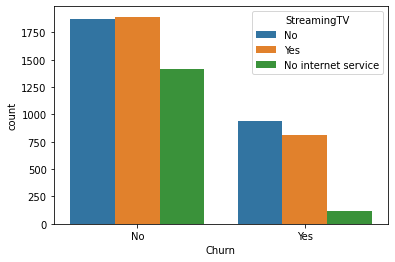

In [142]:
sns.countplot(x='Churn',hue='StreamingTV',data=data)

Users whose StreamingTV is No., falls more into churn category and followed by category Yes

<AxesSubplot:xlabel='Churn', ylabel='count'>

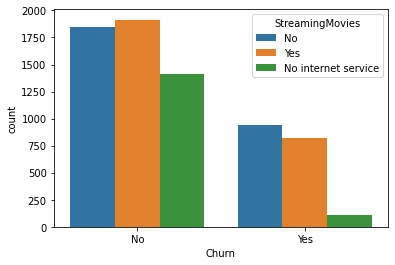

In [143]:
sns.countplot(x='Churn',hue='StreamingMovies',data=data)

Users whose StreamingMovies is No., falls more into churn category and followed by category Yes

<AxesSubplot:xlabel='Churn', ylabel='count'>

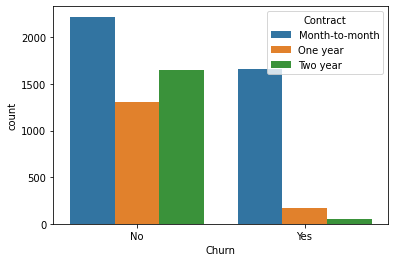

In [144]:
sns.countplot(x='Churn',hue='Contract',data=data)

users whose contract is month-month., falls more into churn category

<AxesSubplot:xlabel='Churn', ylabel='count'>

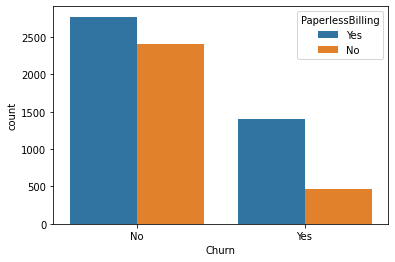

In [145]:
sns.countplot(x='Churn',hue='PaperlessBilling',data=data)

people who enroled for paperless billings falls in to churn category highly

<AxesSubplot:xlabel='Churn', ylabel='count'>

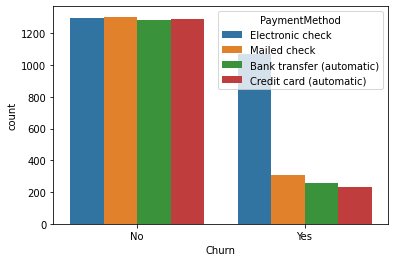

In [146]:
sns.countplot(x='Churn',hue='PaymentMethod',data=data)

users who make payment using electronic check falls into churn category highly

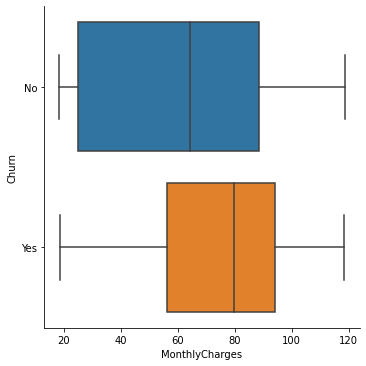

In [148]:
sns.catplot(y='Churn',x='MonthlyCharges',data=data,kind='box')

monthly charge does not impact the churn highy...,

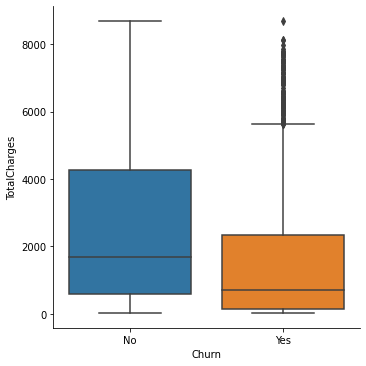

In [150]:
sns.catplot(y='TotalCharges',x='Churn',data=data,kind='box')

there are outliers in total charge under chrun category Yes., we will impute the outliers in feature engineering section

# Multivariate Analysis

<AxesSubplot:>

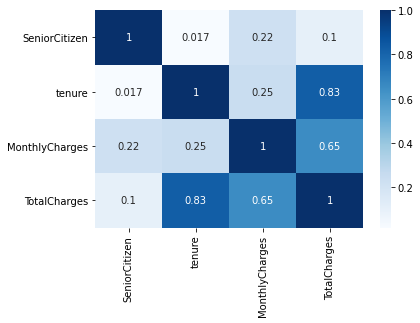

In [151]:
sns.heatmap(data.corr(),annot=True,cmap='Blues')

tennure and nonthly charges are correlated well with the total charges feature

# FEATURE ENGINNERING

# Missing Values

In [154]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

since total charges is a numerical feature and the guassin distribution is not normal, we will replace the null values with median

In [156]:
data['TotalCharges']=data['TotalCharges'].replace(np.NaN,data['TotalCharges'].median())

In [157]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Now the missing values are fixed

# Outlier Handling

SeniorCitizen        AxesSubplot(0.125,0.536818;0.352273x0.343182)
tenure            AxesSubplot(0.547727,0.536818;0.352273x0.343182)
MonthlyCharges          AxesSubplot(0.125,0.125;0.352273x0.343182)
TotalCharges         AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

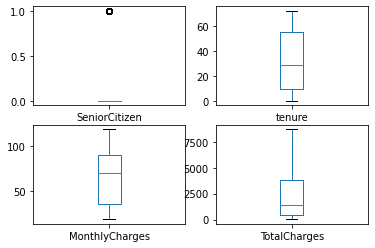

In [158]:
data.plot(kind='box',subplots=True,layout=(2,2))

Since senior citizen is a categorical variable we are not fixing the outliers in senior citizen

# SKEWNESS HANDLING

In [160]:
data.agg(['skew','kurtosis']).transpose()

,skew,kurtosis
SeniorCitizen,1.833633,1.362596
tenure,0.239540,-1.387372
MonthlyCharges,-0.220524,-1.257260
TotalCharges,0.963789,-0.226400


Since senior citizen is a categoriacl variable we are not fixing the skeness in it, but the total charges features skewness should be fixed

In [164]:
data['TotalCharges']=np.sqrt(data['TotalCharges'])
data['TotalCharges'].skew()

0.30983834186805154

now the skeness in total charges featur is fixed.

# ENCODING

In [165]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,5.463515,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,43.468379,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,10.399519,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,42.903963,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,12.314625,Yes


In [176]:
df=data.copy()

In [177]:
df.drop('TotalCharges',axis=1,inplace=True)
df.drop('MonthlyCharges',axis=1,inplace=True)

In [179]:
from sklearn.preprocessing import LabelEncoder

In [181]:
encoder = LabelEncoder()
df=df.apply(encoder.fit_transform)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,5375,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,0
1,3962,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,0
2,2564,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,1
3,5535,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,0
4,6511,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,1


In [182]:
df['TotalCharges']=data['TotalCharges']
df['MonthlyCharges']=data['MonthlyCharges']

In [183]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,TotalCharges,MonthlyCharges
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,0,5.463515,29.85
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,0,43.468379,56.95
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,1,10.399519,53.85
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,0,42.903963,42.30
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,1,12.314625,70.70


In [188]:
df.shape

(7043, 21)

now the categoricaal features are encoded

In [185]:
#lets split the independent variable and dependent variable into x and y

x=df.drop('Churn',axis=1)
y=df['Churn']

In [186]:
x.shape

(7043, 20)

In [187]:
y.shape

(7043,)

In [189]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

since the data set is imblanced, we will  balance train dat set using oversamplig technique SMOTE 

to find the best random state we will use the base algorithm in ML

In [190]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [191]:
best_acc=0
best_random=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    lr_pred=LR.predict(x_test)
    accuracy=accuracy_score(y_test, lr_pred)
    if accuracy>best_acc:
        best_acc=accuracy
        best_random=i

print("Best Accuracy score is : ",best_acc,' and Random_state is : ',i)

Best Accuracy score is :  0.8225691980127751  and Random_state is :  99


Logistic regression gives me the ccuracy of 82% at the random state of 99, lets split the data set at random state 99

In [192]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=99)

# OVER SAMPLING

In [193]:
from imblearn.over_sampling import SMOTE
x_train_os,y_train_os=SMOTE(random_state=99).fit_resample(x_train, y_train)

In [194]:
LR=LogisticRegression()
LR.fit(x_train_os,y_train_os)
LR_PRED=LR.predict(x_test)
print('Accuracy of Logistic Regression is :',accuracy)
print("Classification report for Logistic Regression is : \n",classification_report(y_test,LR_PRED))
print("confusion report for Logistic Regression is : \n", confusion_matrix(y_test,LR_PRED))

Accuracy of Logistic Regression is : 0.7785663591199432
Classification report for Logistic Regression is : 
               precision    recall  f1-score   support

           0       0.88      0.76      0.81      1023
           1       0.53      0.73      0.61       386

    accuracy                           0.75      1409
   macro avg       0.70      0.74      0.71      1409
weighted avg       0.78      0.75      0.76      1409

confusion report for Logistic Regression is : 
 [[774 249]
 [106 280]]


# DecisionTreeClassifier

In [195]:
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier()
DTC.fit(x_train_os,y_train_os)
DTC_PRED=DTC.predict(x_test)
accuracy=accuracy_score(y_test,DTC_PRED)
print('Accuracy of DecisionTreeClassifier is :',accuracy)
print("Classification report for DecisionTreeClassifier is : \n",classification_report(y_test,DTC_PRED))
print("confusion report for DecisionTreeClassifier is : \n", confusion_matrix(y_test,DTC_PRED))

Accuracy of DecisionTreeClassifier is : 0.7097232079489
Classification report for DecisionTreeClassifier is : 
               precision    recall  f1-score   support

           0       0.81      0.78      0.80      1023
           1       0.47      0.53      0.50       386

    accuracy                           0.71      1409
   macro avg       0.64      0.65      0.65      1409
weighted avg       0.72      0.71      0.71      1409

confusion report for DecisionTreeClassifier is : 
 [[796 227]
 [182 204]]


# ADABOOST CLASSIFIER

In [196]:
from sklearn.ensemble import AdaBoostClassifier , RandomForestClassifier
ADA=AdaBoostClassifier()
ADA.fit(x_train_os,y_train_os)
ADA_PRED=ADA.predict(x_test)
accuracy=accuracy_score(y_test,ADA_PRED)
print('Accuracy of AdaBoostClassifier is :',accuracy)
print("Classification report for AdaBoostClassifier is : \n",classification_report(y_test,ADA_PRED))
print("confusion report for AdaBoostClassifier is : \n", confusion_matrix(y_test,ADA_PRED))

Accuracy of AdaBoostClassifier is : 0.7679205110007097
Classification report for AdaBoostClassifier is : 
               precision    recall  f1-score   support

           0       0.88      0.79      0.83      1023
           1       0.56      0.72      0.63       386

    accuracy                           0.77      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.79      0.77      0.78      1409

confusion report for AdaBoostClassifier is : 
 [[805 218]
 [109 277]]


# RANDOM FOREST CLASSIFIER

In [197]:
RFC=RandomForestClassifier()
RFC.fit(x_train_os,y_train_os)
RFC_PRED=RFC.predict(x_test)
accuracy=accuracy_score(y_test,RFC_PRED)
print('Accuracy of RFC is :',accuracy)
print("Classification report for RFC is : \n",classification_report(y_test,RFC_PRED))
print("confusion report for RFC is : \n", confusion_matrix(y_test,RFC_PRED))

Accuracy of RFC is : 0.7842441447835344
Classification report for RFC is : 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1023
           1       0.60      0.62      0.61       386

    accuracy                           0.78      1409
   macro avg       0.73      0.73      0.73      1409
weighted avg       0.79      0.78      0.78      1409

confusion report for RFC is : 
 [[867 156]
 [148 238]]


# XGBOOST

In [198]:
import xgboost as xgb
XGB=xgb.XGBClassifier()
XGB.fit(x_train_os,y_train_os)
XGB_PRED=XGB.predict(x_test)
accuracy=accuracy_score(y_test,RFC_PRED)
print('Accuracy of XGB is :',accuracy)
print("Classification report for XGB is : \n",classification_report(y_test,XGB_PRED))
print("confusion report for XGB is : \n", confusion_matrix(y_test,XGB_PRED))

[02:04:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of XGB is : 0.7842441447835344
Classification report for XGB is : 
               precision    recall  f1-score   support

           0       0.84      0.85      0.85      1023
           1       0.59      0.59      0.59       386

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409

confusion report for XGB is : 
 [[869 154]
 [160 226]]


# SVM

In [200]:
import sklearn.svm as svm

In [201]:
clf = svm.SVC(decision_function_shape='ovo')

clf.fit(x_train_os,y_train_os.ravel())
svc_pred=clf.predict(x_test)

print("SVC accuracy is : ",accuracy_score(y_test,svc_pred))
print("SVC confusion matrix : \n",confusion_matrix(y_test,svc_pred))
print("SVC classification report is: \n",classification_report(y_test,svc_pred))

SVC accuracy is :  0.46486870120652946
SVC confusion matrix : 
 [[360 663]
 [ 91 295]]
SVC classification report is: 
               precision    recall  f1-score   support

           0       0.80      0.35      0.49      1023
           1       0.31      0.76      0.44       386

    accuracy                           0.46      1409
   macro avg       0.55      0.56      0.46      1409
weighted avg       0.66      0.46      0.47      1409



# CROSS VALIDATION

In [203]:
from sklearn.model_selection import cross_val_score
print("Logistic regression cross validation accuracy is :", cross_val_score(LR,x,y,cv=5).mean())
print("DTC cross validation accuracy is :", cross_val_score(DTC,x,y,cv=5).mean())
print("ADA boost validation accuracy is :", cross_val_score(ADA,x,y,cv=5).mean())
print("RFC cross validation accuracy is :", cross_val_score(RFC,x,y,cv=5).mean())
print("XGB cross validation accuracy is :", cross_val_score(XGB,x,y,cv=5).mean())
print("SVC cross validation accuracy is :", cross_val_score(clf,x,y,cv=5).mean())

Logistic regression cross validation accuracy is : 0.7929862410478096
DTC cross validation accuracy is : 0.725117346280405
ADA boost validation accuracy is : 0.8009365523582167
RFC cross validation accuracy is : 0.7911423720885218
[12:47:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:47:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:47:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluati

# XGBOOST gives  the best accuracy score of 78%., Lets perform hyper paramter tunning with grid search CV for XGBOOST

In [204]:
from sklearn.model_selection import GridSearchCV

In [205]:
parmeters={
    'booster':['gbtree','gblinear','dart'],
    'max_depth':range(0,6) 
}

In [207]:
gsv=GridSearchCV(XGB,parmeters)
gsv.fit(x_train_os,y_train_os)
gsv

[12:57:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:57:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:57:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:57:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:57:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:57:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:57:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:57:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel


[12:57:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:57:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "interaction_constraints", "max_delta_step", "max_depth", "min_child_weight", "monotone_constraints", "num_parallel_tree", "subsample", "tree_method" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:57:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner

[12:57:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "interaction_constraints", "max_delta_step", "max_depth", "min_child_weight", "monotone_constraints", "num_parallel_tree", "subsample", "tree_method" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:57:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:57:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.


[12:57:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:57:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "interaction_constraints", "max_delta_step", "max_depth", "min_child_weight", "monotone_constraints", "num_parallel_tree", "subsample", "tree_method" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:57:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner

[12:58:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:58:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:58:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:58:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

GridSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=8,
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
                            

In [208]:
print(gsv.best_params_)

{'booster': 'gbtree', 'max_depth': 4}


In [209]:
import xgboost as xgb
Final_model=xgb.XGBClassifier(booster='gbtree',max_depth=4)
Final_model.fit(x_train_os,y_train_os)
Final_model_pred=Final_model.predict(x_test)
accuracy=accuracy_score(y_test,Final_model_pred)
print('Accuracy of XGB is :',accuracy)
print("Classification report for XGB is : \n",classification_report(y_test,Final_model_pred))
print("confusion report for XGB is : \n", confusion_matrix(y_test,Final_model_pred))

[13:01:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of XGB is : 0.7814052519517388
Classification report for XGB is : 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1023
           1       0.60      0.60      0.60       386

    accuracy                           0.78      1409
   macro avg       0.73      0.73      0.73      1409
weighted avg       0.78      0.78      0.78      1409

confusion report for XGB is : 
 [[868 155]
 [153 233]]


# AUC,ROC curve

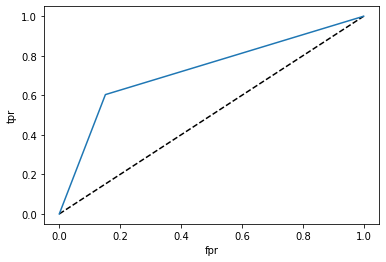

In [212]:
from sklearn.metrics import roc_curve , roc_auc_score

Final_model_pred_prob=Final_model.predict_proba(x_test)[:,1]
fpr,tpr,threshold =roc_curve(y_test,Final_model_pred)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random forest Classifier')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()


In [214]:
import joblib

joblib.dump(Final_model,'customer_churn_model.pkl')

['customer_churn_model.pkl']